Names: Sameer Ahmed, Trevor Allison, Madeleine Cope, Teagan Milford, Laurenz Pehl, Sanyam Jain

In [ ]:
!pip install sec-api

In [ ]:
!pip install pandas numpy spacy
!python -m spacy download en_core_web_lg

2023-10-11 23:43:44.802341: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-11 23:43:45.991141: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
from sec_api import QueryApi
from sec_api import ExtractorApi
import requests
import json
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np

In [ ]:
# DYNAMIC URL FETCH :Start
from sec_api import QueryApi

queryApi = QueryApi(api_key="fa69bc46cb16a294bb43dc90b286dcc433aa6fae52a6b8ed9f7276de560f00d0")


ticker_list = ['HON', 'EFX', 'GE', 'BA', 'UPS', 'DE', 'ADP', 'LMT', 'ITW']
dict1 = {}
for key in ticker_list:
    dict1[key] = None

for tick in ticker_list:
    query = {
    "query": { "query_string": {
        "query": "formType:\"10-K\" AND ticker:" + tick + " AND filedAt:[2009-01-01 TO 2019-12-31] ", # only 10-Ks
    }},
    "sort": [{ "filedAt": { "order": "desc" } }]
    }
    response = queryApi.get_filings(query)
    dict2 = {}
    for i in response['filings']:
        if i['formType'] == '10-K':
            print(i['linkToFilingDetails'])
            print(i['filedAt'])
            dict2[i['filedAt'][:4]] = i['linkToFilingDetails']
            print("==== 000000 ====")
        else:
            print('*************10K not found**********')
        print("=======================================")
    dict1[tick] = dict2

df = pd.DataFrame(dict1)
df.T.to_csv('10K_Filings_URLS.csv' , header= True , index = True)

In [ ]:
tickers_and_urls = {}

# Loop through the keys of the outer dictionary
for key, inner_dict in dict1.items():
    # Get the values from the inner dictionary and convert them to a list
    values_list = list(inner_dict.values())

    # Add the key-value pair to the simple dictionary
    tickers_and_urls[key] = values_list

# Dynamic URL Fetch end

In [ ]:
# ## GET THE LINKS DYNAMICALLY

# import pandas as pd

# queryApi = QueryApi(api_key='b0dbe1d1614eb7302d24b7fb513b63b65f671014140c55be0f3dca0aac05177d')


# base_query = {
#   "query": {
#       "query_string": {
#           "query": "HON", # this will be set during runtime
#           "time_zone": "America/New_York"
#       }
#   },
#   "from": "0",
#   "size": "200", # don’t change this
#   # sort by filedAt
#   "sort": [{ "filedAt": { "order": "desc" } }]
# }

# # List to store filing URLs along with their ticker and filing date
# filings_data = []

# for year in range(2019, 2010, -1):
#     print(f"starting {year}")

#     for month in range(1, 13, 1):
#         universe_query = (
#             "formType:\"10-K\" AND "
#             f"filedAt:[{year}-{month:02d}-01 TO {year}-{month:02d}-31]"
#         )

#         print(universe_query)
#         base_query["query"]["query_string"]["query"] = universe_query

#         for from_batch in range(0, 400, 200):  # Adjust the range as needed
#             base_query["from"] = str(from_batch)  # Ensure it's a string

#             response = queryApi.get_filings(base_query)

#             if len(response["filings"]) == 0:
#                 break

#             for filing in response["filings"]:
#                 filings_data.append({
#                     "URL": filing["linkToFilingDetails"],
#                     "Ticker": filing["ticker"],  # Adjust the key as per actual response structure
#                     "FiledAt": filing["filedAt"]   # Adjust the key as per actual response structure
#                 })

# # Convert list of dictionaries to DataFrame
# filings_df = pd.DataFrame(filings_data)

# # Print DataFrame
# print(filings_df)


In [ ]:
#Links for each stock's 10K from 2010-2019
HON = ['https://www.sec.gov/Archives/edgar/data/0000773840/000093041311000961/c63936_10-k.htm','https://www.sec.gov/Archives/edgar/data/0000773840/000093041312000976/c68029_10k.htm','https://www.sec.gov/Archives/edgar/data/0000773840/000093041313000907/c72130_10-k.htm','https://www.sec.gov/Archives/edgar/data/0000773840/000093041314000634/c75936_10k.htm','https://www.sec.gov/Archives/edgar/data/0000773840/000093041315000621/c79276_10k.htm', 'https://www.sec.gov/Archives/edgar/data/0000773840/000093041316005457/c83288_10k.htm','https://www.sec.gov/Archives/edgar/data/0000773840/000093041317000391/c86783_10k.htm','https://www.sec.gov/Archives/edgar/data/0000773840/000093041318000292/c89913_10k.htm','https://www.sec.gov/Archives/edgar/data/0000773840/000093041319000366/c92779_10k.htm','https://www.sec.gov/Archives/edgar/data/0000773840/000077384020000009/hon1231201910k.htm']
EFX = ['https://www.sec.gov/Archives/edgar/data/0000033185/000114420411010496/v209688_10k.htm','https://www.sec.gov/Archives/edgar/data/0000033185/000114420412010639/v244511_10k.htm','https://www.sec.gov/Archives/edgar/data/0000033185/000114420413010696/v332542_10k.htm','https://www.sec.gov/Archives/edgar/data/0000033185/000114420414012238/v368092_10k.htm','https://www.sec.gov/Archives/edgar/data/0000033185/000162828015001024/efx10k20141231.htm','https://www.sec.gov/Archives/edgar/data/0000033185/000003318516000037/efx10k20151231.htm','https://www.sec.gov/Archives/edgar/data/0000033185/000003318517000008/efx10k20161231.htm','https://www.sec.gov/Archives/edgar/data/0000033185/000003318518000011/efx10k20171231.htm','https://www.sec.gov/Archives/edgar/data/0000033185/000003318519000007/efx10k20181231.htm','https://www.sec.gov/Archives/edgar/data/0000033185/000003318520000011/efx-20191231.htm']
GE = ['https://www.sec.gov/Archives/edgar/data/0000040545/000119312511047479/d10k.htm','https://www.sec.gov/Archives/edgar/data/0000040545/000004054512000016/ge10k.htm','https://www.sec.gov/Archives/edgar/data/0000040545/000004054513000036/geform10k2012.htm','https://www.sec.gov/Archives/edgar/data/0000040545/000004055414000023/geform10k2013.htm','https://www.sec.gov/Archives/edgar/data/0000040545/000004054515000030/ge10k2014.htm','https://www.sec.gov/Archives/edgar/data/0000040545/000004054516000145/ge10k2015.htm','https://www.sec.gov/Archives/edgar/data/0000040545/000004054517000010/ge10k2016.htm','https://www.sec.gov/Archives/edgar/data/0000040545/000004054518000014/ge10-k2017.htm','https://www.sec.gov/Archives/edgar/data/0000040545/000004054519000014/ge10-k2018.htm','https://www.sec.gov/Archives/edgar/data/0000040545/000004054520000009/ge10-k2019.htm']
BA = ['https://www.sec.gov/Archives/edgar/data/0000012927/000119312511028490/d10k.htm','https://www.sec.gov/Archives/edgar/data/0000012927/000119312512048565/d255574d10k.htm','https://www.sec.gov/Archives/edgar/data/0000012927/000001292713000014/a201212dec3110k.htm','https://www.sec.gov/Archives/edgar/data/0000012927/000001292714000004/a201312dec3110k.htm','https://www.sec.gov/Archives/edgar/data/0000012927/000001292715000011/a201412dec3110k.htm','https://www.sec.gov/Archives/edgar/data/0000012927/000001292716000099/a201512dec3110k.htm','https://www.sec.gov/Archives/edgar/data/0000012927/000001292717000006/a201612dec3110k.htm','https://www.sec.gov/Archives/edgar/data/0000012927/000001292718000007/a201712dec3110k.htm','https://www.sec.gov/Archives/edgar/data/0000012927/000001292719000010/a201812dec3110k.htm','https://www.sec.gov/Archives/edgar/data/0000012927/000001292720000014/a201912dec3110k.htm']
UPS = ['https://www.sec.gov/Archives/edgar/data/0001090727/000119312511049356/d10k.htm','https://www.sec.gov/Archives/edgar/data/0001090727/000119312512081067/d274494d10k.htm','https://www.sec.gov/Archives/edgar/data/0001090727/000109072713000005/ups-12312012x10k.htm','https://www.sec.gov/Archives/edgar/data/0001090727/000109072714000009/ups-12312013x10k.htm','https://www.sec.gov/Archives/edgar/data/0001090727/000109072715000008/ups-12312014x10k.htm','https://www.sec.gov/Archives/edgar/data/0001090727/000109072716000053/ups-12312015x10k.htm','https://www.sec.gov/Archives/edgar/data/0001090727/000109072717000011/ups-12312016x10k.htm','https://www.sec.gov/Archives/edgar/data/0001090727/000109072718000009/ups-12312017x10k.htm','https://www.sec.gov/Archives/edgar/data/0001090727/000109072719000006/ups-12312018x10k.htm','https://www.sec.gov/Archives/edgar/data/0001090727/000109072720000005/ups-12312019x10k.htm']
DE = ['https://www.sec.gov/Archives/edgar/data/0000315189/000110465910063219/a10-17745_110k.htm','https://www.sec.gov/Archives/edgar/data/0000315189/000110465911070023/a11-24734_110k.htm','https://www.sec.gov/Archives/edgar/data/0000315189/000110465912084558/a12-16222_110k.htm','https://www.sec.gov/Archives/edgar/data/0000315189/000110465913090354/a13-17985_110k.htm','https://www.sec.gov/Archives/edgar/data/0000315189/000110465914087794/a14-20671_110k.htm','https://www.sec.gov/Archives/edgar/data/0000315189/000104746915009300/a2226814z10-k.htm','https://www.sec.gov/Archives/edgar/data/0000315189/000104746916017244/a2230400z10-k.htm','https://www.sec.gov/Archives/edgar/data/0000315189/000104746917007719/a2233505z10-k.htm','https://www.sec.gov/Archives/edgar/data/0000315189/000104746918007694/a2236950z10-k.htm','https://www.sec.gov/Archives/edgar/data/0000315189/000155837019011614/de-20191103x10k.htm']
ADP = ['https://www.sec.gov/Archives/edgar/data/0000008670/000120677410001881/adp_10k.htm','https://www.sec.gov/Archives/edgar/data/0000008670/000120677411001935/adp_10k.htm','https://www.sec.gov/Archives/edgar/data/0000008670/000120677412003634/adp_10k.htm','https://www.sec.gov/Archives/edgar/data/0000008670/000000867013000015/q4fy1310-k.htm','https://www.sec.gov/Archives/edgar/data/0000008670/000000867014000015/q4fy1410k.htm','https://www.sec.gov/Archives/edgar/data/0000008670/000000867015000021/q4fy1510k.htm','https://www.sec.gov/Archives/edgar/data/0000008670/000000867016000053/q4fy1610kinq4fy16.htm','https://www.sec.gov/Archives/edgar/data/0000008670/000000867017000010/q4fy1710k.htm','https://www.sec.gov/Archives/edgar/data/0000008670/000000867018000011/q4fy1810k.htm','https://www.sec.gov/Archives/edgar/data/0000008670/000000867019000021/q4fy1910k.htm']
LMT = ['https://www.sec.gov/Archives/edgar/data/0000936468/000119312511045739/d10k.htm','https://www.sec.gov/Archives/edgar/data/0000936468/000119312512074929/d221578d10k.htm','https://www.sec.gov/Archives/edgar/data/0000936468/000119312513082873/d428940d10k.htm','https://www.sec.gov/Archives/edgar/data/0000936468/000119312514055034/d621068d10k.htm','https://www.sec.gov/Archives/edgar/data/0000936468/000119312515038681/d808572d10k.htm','https://www.sec.gov/Archives/edgar/data/0000936468/000119312516476010/d62685d10k.htm','https://www.sec.gov/Archives/edgar/data/0000936468/000119312517036192/d290249d10k.htm','https://www.sec.gov/Archives/edgar/data/0000936468/000093646818000009/lmtq4201710k.htm','https://www.sec.gov/Archives/edgar/data/0000936468/000093646819000009/lmtq4201810k.htm','https://www.sec.gov/Archives/edgar/data/0000936468/000093646820000016/lmtq4201910k.htm']
ITW = ['https://www.sec.gov/Archives/edgar/data/0000049826/000095012311019620/c61393e10vk.htm','https://www.sec.gov/Archives/edgar/data/0000049826/000119312512067004/d259927d10k.htm','https://www.sec.gov/Archives/edgar/data/0000049826/000004982613000007/itw-20121231x10k.htm','https://www.sec.gov/Archives/edgar/data/0000049826/000004982614000022/itw-20131231x10k.htm','https://www.sec.gov/Archives/edgar/data/0000049826/000004982615000016/itw-20141231x10k.htm','https://www.sec.gov/Archives/edgar/data/0000049826/000004982616000151/itw-20151231x10k.htm','https://www.sec.gov/Archives/edgar/data/0000049826/000004982617000022/itw-20161231x10k.htm','https://www.sec.gov/Archives/edgar/data/0000049826/000004982618000017/itw-20171231x10k.htm','https://www.sec.gov/Archives/edgar/data/0000049826/000004982619000021/itw-20181231x10k.htm','https://www.sec.gov/Archives/edgar/data/0000049826/000004982620000020/itw-20191231x10k.htm']
CSX = ['https://www.sec.gov/Archives/edgar/data/0000277948/000114036111010655/document_10k.htm','https://www.sec.gov/Archives/edgar/data/0000277948/000027794812000014/csx-12302011x10k.htm','https://www.sec.gov/Archives/edgar/data/0000277948/000027794813000008/csx-12282012x10k.htm','https://www.sec.gov/Archives/edgar/data/0000277948/000027794814000011/csx-12272013x10k.htm','https://www.sec.gov/Archives/edgar/data/0000277948/000027794815000010/csx-12262014x10k.htm','https://www.sec.gov/Archives/edgar/data/0000277948/000027794816000046/csx-12252015x10k.htm','https://www.sec.gov/Archives/edgar/data/0000277948/000027794817000009/csx-12302016x10k.htm','https://www.sec.gov/Archives/edgar/data/0000277948/000027794818000009/csx-12312017x10k.htm','https://www.sec.gov/Archives/edgar/data/0000277948/000027794819000011/csx-12312018x10k.htm','https://www.sec.gov/Archives/edgar/data/0000277948/000027794820000008/csx-12312019x10k.htm']
FDX = ['https://www.sec.gov/Archives/edgar/data/0001048911/000095012310065730/c03116e10vk.htm','https://www.sec.gov/Archives/edgar/data/0001048911/000095012311065246/c19556e10vk.htm','https://www.sec.gov/Archives/edgar/data/0001048911/000119312512303558/d375407d10k.htm','https://www.sec.gov/Archives/edgar/data/0001048911/000119312513290858/d563720d10k.htm','https://www.sec.gov/Archives/edgar/data/0001048911/000119312514267851/d752614d10k.htm','https://www.sec.gov/Archives/edgar/data/0001048911/000119312515252494/d48165d10k.htm','https://www.sec.gov/Archives/edgar/data/0001048911/000119312516650267/d207174d10k.htm','https://www.sec.gov/Archives/edgar/data/0001048911/000095012317006152/fdx-10k_20170531.htm','https://www.sec.gov/Archives/edgar/data/0001048911/000156459018016877/fdx-10k_20180531.htm','https://www.sec.gov/Archives/edgar/data/0001048911/000156459019025065/fdx-10k_20190531.htm']
NOC = ['https://www.sec.gov/Archives/edgar/data/0001133421/000095012311010835/v57435e10vk.htm','https://www.sec.gov/Archives/edgar/data/0001133421/000119312512045323/d250683d10k.htm','https://www.sec.gov/Archives/edgar/data/0001133421/000113342113000007/noc-12312012x10k.htm','https://www.sec.gov/Archives/edgar/data/0001133421/000113342114000006/noc-12312013x10k.htm','https://www.sec.gov/Archives/edgar/data/0001133421/000113342115000008/noc-12312014x10k.htm','https://www.sec.gov/Archives/edgar/data/0001133421/000113342116000065/noc-12312015x10k.htm','https://www.sec.gov/Archives/edgar/data/0001133421/000113342117000008/noc-12312016x10k.htm','https://www.sec.gov/Archives/edgar/data/0001133421/000113342118000005/noc-12312017x10k.htm','https://www.sec.gov/Archives/edgar/data/0001133421/000113342119000007/noc-12312018x10k.htm','https://www.sec.gov/Archives/edgar/data/0001133421/000113342120000006/noc-12312019x10k.htm']

In [ ]:
# We can comment this since 'tickers_and_urls' will be created in the exact format in the code patch above (Dynamic URL Fetch)

# tickers = ['HON', 'EFX', 'GE', 'BA', 'UPS', 'DE', 'ADP', 'LMT', 'ITW', 'CSX', 'FDX', 'NOC']
# # List of corresponding URL lists
# url_lists = [HON, EFX, GE, BA, UPS, DE, ADP, LMT, ITW, CSX, FDX, NOC]

tickers = ['HON', 'EFX', 'GE', 'BA', 'UPS', 'DE', 'ADP', 'LMT', 'ITW']

# List of corresponding URL lists
url_lists = [HON, EFX, GE, BA, UPS, DE, ADP, LMT, ITW, CSX]

# Create dictionary using a for loop
tickers_and_urls = {tickers[i]: url_lists[i] for i in range(len(tickers))}

In [ ]:
extractorApi = ExtractorApi("b0dbe1d1614eb7302d24b7fb513b63b65f671014140c55be0f3dca0aac05177d")

def get_MDA_cleaned(filing_url):
  section_text = extractorApi.get_section(filing_url, '7', 'text')

  cleaned = re.sub(r'&#\d{3};', '', section_text)

  # Remove everything between ##TABLE_START and ##TABLE_END
  cleaned = re.sub(r'##TABLE_START.*?##TABLE_END', '', cleaned, flags=re.DOTALL)

  return cleaned

year = 2013

data = {'Year': [], 'Ticker': [], 'Text': []}

# Loop through all tickers and their URLs
for ticker, urls in tickers_and_urls.items():
    for url in urls:
        text = get_MDA_cleaned(url)
        data['Year'].append(year)
        data['Ticker'].append(ticker)
        data['Text'].append(text)
        year += 1

    # Reset the year after processing all URLs for a ticker
    year = 2013

df = pd.DataFrame(data)

In [ ]:
df.to_csv('data.csv', index=False)

Similarity Analysis Using Different Method

In [ ]:
df = pd.read_csv('data.csv', index_col=0)

In [ ]:
nlp = spacy.load('en_core_web_lg')

def cosine_similarity(a, b):
    return a.dot(b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Group by ticker and calculate average cosine similarity
results = []
for ticker, group in df.groupby('Ticker'):
    # Filter out NaN or empty texts
    cleaned_texts = group['Text'].dropna().tolist()
    if cleaned_texts:
        vectors = [nlp(text).vector for text in cleaned_texts if text.strip()]
        cosine_sims = [cosine_similarity(vectors[i], vectors[j]) for i in range(len(vectors)) for j in range(i+1, len(vectors))]
        avg_cosine_sim = np.mean(cosine_sims) if cosine_sims else np.nan  # Handle case with only one text
        results.append({'Ticker': ticker, 'Average Cosine Similarity': avg_cosine_sim})

results_df = pd.DataFrame(results)

print(results_df)


  Ticker  Average Cosine Similarity
0    ADP                   0.990319
1     BA                   0.992253
2     DE                   0.879401
3    EFX                   0.998288
4     GE                   0.868859
5    HON                   0.998801
6    ITW                   0.988852
7    LMT                   0.996967
8    UPS                   0.996183


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

vectorizer = TfidfVectorizer()

# Group by ticker and calculate average cosine similarity
results = []
for ticker, group in df.groupby('Ticker'):
    cleaned_texts = group['Text'].dropna().tolist()  # Remove NaN values
    cleaned_texts = [text for text in cleaned_texts if text.strip()]  # Remove empty strings or strings with only whitespaces

    if len(cleaned_texts) > 1:  # Proceed only if there are at least two texts for comparison
        tfidf_matrix = vectorizer.fit_transform(cleaned_texts)
        cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
        np.fill_diagonal(cosine_sim, 0)  # Set diagonal to 0 as we don't need self-similarity
        avg_cosine_sim = cosine_sim.sum() / (cosine_sim.shape[0] * (cosine_sim.shape[0] - 1))  # Calculate average cosine similarity
        results.append({'Ticker': ticker, 'Average Cosine Similarity': avg_cosine_sim})
    else:
        results.append({'Ticker': ticker, 'Average Cosine Similarity': np.nan})  # If only one text, set average cosine similarity to NaN

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print DataFrame
print(results_df)


  Ticker  Average Cosine Similarity
0    ADP                   0.911459
1     BA                   0.925311
2     DE                   0.684378
3    EFX                   0.950963
4     GE                   0.586411
5    HON                   0.952326
6    ITW                   0.883249
7    LMT                   0.963510
8    UPS                   0.941347


Getting Stocks Actual Performance

In [ ]:
!pip install tiingo pandas

In [ ]:
import os
from tiingo import TiingoClient
import pandas as pd

# Set up the Tiingo client
config = {
    'session': True,
    'api_key': '1826d25dc4a2f20f08b02d330e62d84475fafba9'  # Replace with your Tiingo API key
}
client = TiingoClient(config)

def get_yearly_changes(ticker):
    # Fetch historical prices for the ticker from 2013 to 2020
    historical_prices = client.get_ticker_price(ticker,
                                                fmt='json',
                                                startDate='2009-01-01',
                                                endDate='2019-12-31',
                                                frequency='daily')

    # Convert the data to a DataFrame
    df = pd.DataFrame(historical_prices)
    df['date'] = pd.to_datetime(df['date'])

    # Extract the closing price at the end of each year
    yearly_closing = df.groupby(df['date'].dt.year)['close'].last()

    # Calculate yearly changes
    yearly_changes = yearly_closing.pct_change().dropna()

    return yearly_changes

if __name__ == "__main__":
    tickers = ['HON', 'EFX', 'GE', 'BA', 'UPS', 'DE', 'ADP', 'LMT', 'ETN', 'ITW', 'CSX', 'FDX', 'NOC']
    all_changes = {}

    for ticker in tickers:
        all_changes[ticker] = get_yearly_changes(ticker)

    # Convert the results to a DataFrame for better visualization
    result_df = pd.DataFrame(all_changes)
    print(result_df)

           HON       EFX        GE        BA       UPS        DE       ADP  \
date                                                                         
2010  0.356122  0.152477  0.208857  0.205616  0.265121  0.535404  0.080803   
2011  0.022385  0.088202 -0.020776  0.123966  0.008405 -0.068633  0.167027   
2012  0.167801  0.397006  0.171971  0.027403  0.007378  0.117259  0.054064   
2013  0.439578  0.276608  0.335398  0.811173  0.425200  0.056816  0.419269   
2014  0.093576  0.170502 -0.098466 -0.047696  0.057956 -0.031315  0.031820   
2015  0.036529  0.377149  0.232687  0.112402 -0.134389 -0.137900  0.016193   
2016  0.118567  0.061596  0.014446  0.076700  0.191312  0.350990  0.213173   
2017  0.323781 -0.002622 -0.447785  0.894335  0.039341  0.518925  0.140202   
2018 -0.138498 -0.210227 -0.566189  0.093554 -0.181452 -0.046898  0.118867   
2019  0.339691  0.504564  0.474240  0.010109  0.200246  0.161494  0.300336   

           LMT       ETN       ITW       CSX       FDX       NO

<Axes: xlabel='date'>

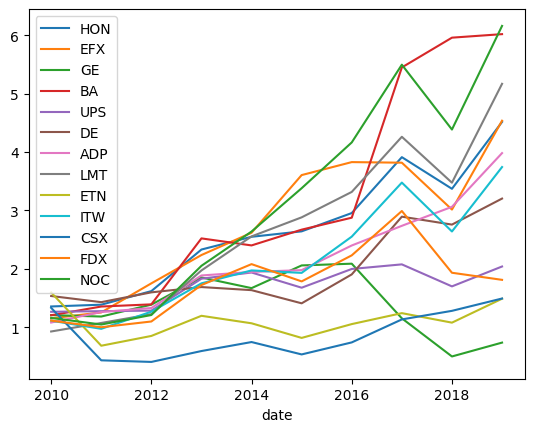

In [ ]:
result_df.add(1).cumprod().plot()

In [ ]:
import pandas as pd

from tiingo import TiingoClient                       # Stock prices.
tiingo = TiingoClient({'api_key':'b0d731010543ea64f4e68e57c0ab873ada655279'})

#prices = tiingo.get_dataframe(['HON','EFX','GE','BA','UPS','DE','ADP','LMT','ETN','ITW','CSX','FDX','NOC'],'2010-1-1','2019-12-31',metric_name = 'adjClose')
prices = tiingo.get_dataframe(['ADP','BA','DE','EFX','GE','HON','ITW','LMT','UPS'],'2010-1-1','2019-12-31',metric_name = 'adjClose')
prices.index = pd.to_datetime(prices.index).tz_convert(None)
prices

,ADP,BA,DE,EFX,GE,HON,ITW,LMT,UPS
2010-01-04,27.070039,43.712259,42.671674,26.785884,68.350720,28.653211,34.745889,49.797451,38.507323
2010-01-05,26.924671,45.143917,42.511826,26.777372,68.704640,28.710020,34.652890,50.315837,38.573509
2010-01-06,26.861468,46.513329,42.397649,27.066765,68.350720,28.710020,34.574199,49.577137,38.288907
2010-01-07,26.848827,48.396271,42.702121,27.177415,71.889916,29.263911,34.795966,48.216373,37.997687
2010-01-08,26.810905,47.929426,43.866724,27.185927,73.438314,29.910118,35.125039,48.993952,39.824435
...,...,...,...,...,...,...,...,...,...
2019-12-24,156.899622,331.015759,165.316187,135.349694,68.840022,163.352185,163.999524,352.569540,105.603350
2019-12-26,157.305931,327.954112,165.600398,136.038571,69.086099,163.880293,165.000742,354.494273,106.236988
2019-12-27,157.693770,328.172801,166.557243,136.038571,68.778503,163.509691,164.864212,355.668993,106.147743
2019-12-30,156.604125,324.455087,165.714083,134.786950,68.163310,163.454101,164.727683,354.132821,103.916624


In [ ]:
r = prices.pct_change()
r

,ADP,BA,DE,EFX,GE,HON,ITW,LMT,UPS
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.005370,0.032752,-0.003746,-0.000318,0.005178,0.001983,-0.002677,0.010410,0.001719
2010-01-06,-0.002347,0.030334,-0.002686,0.010807,-0.005151,0.000000,-0.002271,-0.014681,-0.007378
2010-01-07,-0.000471,0.040482,0.007181,0.004088,0.051780,0.019293,0.006414,-0.027447,-0.007606
2010-01-08,-0.001412,-0.009646,0.027273,0.000313,0.021538,0.022082,0.009457,0.016127,0.048075
...,...,...,...,...,...,...,...,...,...
2019-12-24,-0.000647,-0.013479,-0.003142,0.000430,0.002688,-0.000680,-0.004915,-0.004414,-0.005129
2019-12-26,0.002590,-0.009249,0.001719,0.005090,0.003575,0.003233,0.006105,0.005459,0.006000
2019-12-27,0.002466,0.000667,0.005778,0.000000,-0.004452,-0.002261,-0.000827,0.003314,-0.000840
2019-12-30,-0.006910,-0.011329,-0.005062,-0.009200,-0.008945,-0.000340,-0.000828,-0.004319,-0.021019


<Axes: >

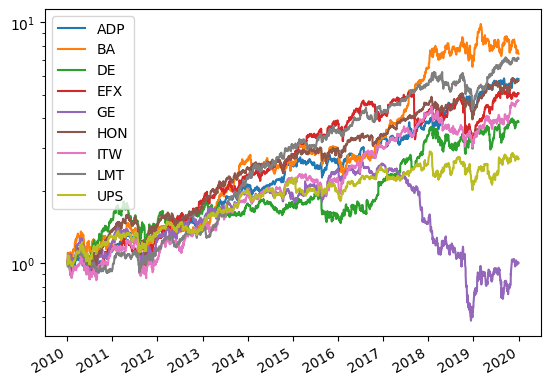

In [ ]:
r.add(1).cumprod().plot(logy=True)

In [ ]:
#This is the compound factor what $1 invested at the beginning would have turned into by end of 2019
compound_factors = r.add(1).prod()
compound_factors

ADP    5.816188
BA     7.407965
DE     3.863400
EFX    5.075481
GE     1.004459
HON    5.723319
ITW    4.733547
LMT    7.065737
UPS    2.712989
dtype: float64

<Axes: >

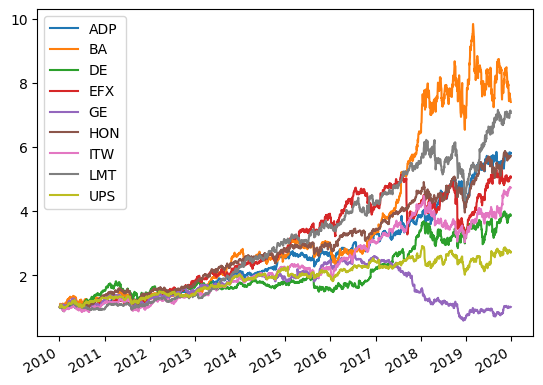

In [ ]:
r.add(1).cumprod().plot()

In [ ]:
#Let's look at the industrial Select ETF for the same time period
XLI_prices = tiingo.get_dataframe(['XLI'],'2010-1-1','2019-12-31',metric_name = 'adjClose')
XLI_prices.index = pd.to_datetime(XLI_prices.index).tz_convert(None)
XLI_returns = XLI_prices.pct_change()
XLI_returns

,XLI
2010-01-04,NaN
2010-01-05,0.003531
2010-01-06,0.002111
2010-01-07,0.010885
2010-01-08,0.015978
...,...
2019-12-24,-0.004019
2019-12-26,0.002323
2019-12-27,-0.000854
2019-12-30,-0.004640


<Axes: >

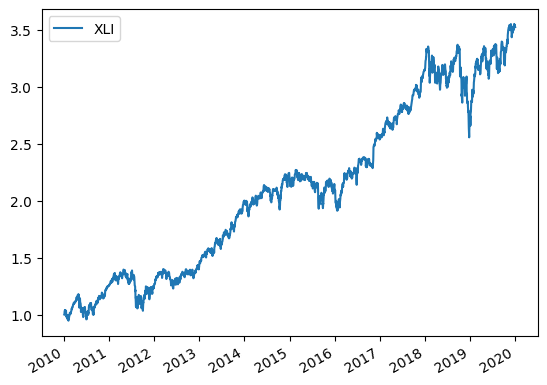

In [ ]:
#Value of $1 invested at the beginning of 2010 to 2019
XLI_returns.add(1).cumprod().plot()

In [ ]:
#Compound Factor for XLI Industrial ETF
XLI_compound = XLI_returns.add(1).prod()
XLI_compound

XLI    3.525256
dtype: float64

In [ ]:
xli_value = XLI_compound[0]
xli_value

3.5252559547804285

In [ ]:
#Create dataframe of those stocks that have out and underperformed the Industrial ETF
outperformer = compound_factors[compound_factors > xli_value]
underperformer = compound_factors[compound_factors < xli_value]

In [ ]:
data = {
    'Stock': ['ADP','BA','DE','EFX','GE','HON','ITW','LMT','UPS'],
    'Avg_Cosine_Similarity': [0.9114590600084234, 0.9253109099618219,0.684378,0.9509628469211835,0.586411,0.9523259711310581,0.8832493142794414, 0.9635099351147719,0.941346511467011]
}
cos_df = pd.DataFrame(data)
cos_df

,Stock,Avg_Cosine_Similarity
0,ADP,0.911459
1,BA,0.925311
2,DE,0.684378
3,EFX,0.950963
4,GE,0.586411
5,HON,0.952326
6,ITW,0.883249
7,LMT,0.963510
8,UPS,0.941347


In [ ]:
compound_df = pd.DataFrame(compound_factors, columns=['compound_factors'])
compound_df.index.name = 'Stock'
compound_df

,compound_factors
Stock,
ADP,5.816188
BA,7.407965
DE,3.863400
EFX,5.075481
GE,1.004459
HON,5.723319
ITW,4.733547
LMT,7.065737
UPS,2.712989


In [ ]:
merged_df = pd.merge(cos_df, compound_df, on='Stock', how = 'left')
merged_df

,Stock,Avg_Cosine_Similarity,compound_factors
0,ADP,0.911459,5.816188
1,BA,0.925311,7.407965
2,DE,0.684378,3.863400
3,EFX,0.950963,5.075481
4,GE,0.586411,1.004459
5,HON,0.952326,5.723319
6,ITW,0.883249,4.733547
7,LMT,0.963510,7.065737
8,UPS,0.941347,2.712989


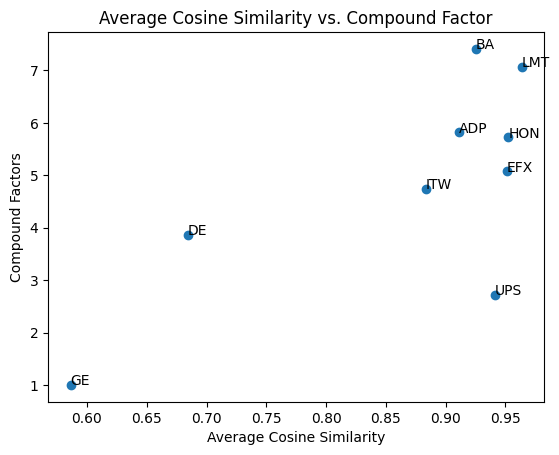

In [ ]:
import matplotlib.pyplot as plt
#Create scatter plot
plt.scatter(merged_df['Avg_Cosine_Similarity'], merged_df['compound_factors'])

#Label each point with stock name
for i, Stock in enumerate(merged_df['Stock']):
  plt.annotate(Stock, (merged_df['Avg_Cosine_Similarity'].iloc[i], merged_df['compound_factors'].iloc[i]))

#Titles for plot and axis
plt.title('Average Cosine Similarity vs. Compound Factor')
plt.xlabel('Average Cosine Similarity')
plt.ylabel('Compound Factors')

plt.show()